<a href="https://colab.research.google.com/github/Lily1619/Fire-Rescue-Robot/blob/main/DSP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as sg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
np.load("/content/drive/MyDrive/datasets/dsp_datasets/arrhythmia_preprocessed/100_1.npy")

array([-0.03720375, -0.04355592, -0.03254148, ...,  0.00841994,
        0.00907958, -0.00280602])

In [ ]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 4.3 MB/s eta 0:00:00


In [ ]:
import wfdb

In [ ]:
direct = "/content/drive/MyDrive/datasets/dsp_datasets/arrhythmia/100"
record = wfdb.rdrecord(direct)

In [ ]:
direct_2 = "/content/drive/MyDrive/datasets/dsp_datasets/atrial/04043"
record_2 = wfdb.rdrecord(direct_2)

In [ ]:
direct_3 = "/content/drive/MyDrive/datasets/dsp_datasets/supra/800"
record_3 = wfdb.rdrecord(direct_3)

In [ ]:
sampling = record_3.fs
sampling

128

In [ ]:
signal = record.p_signal
signal = signal[:,0]

In [ ]:
sampling = record.fs
sampling

360

In [ ]:
sampling = record_2.fs
sampling

250

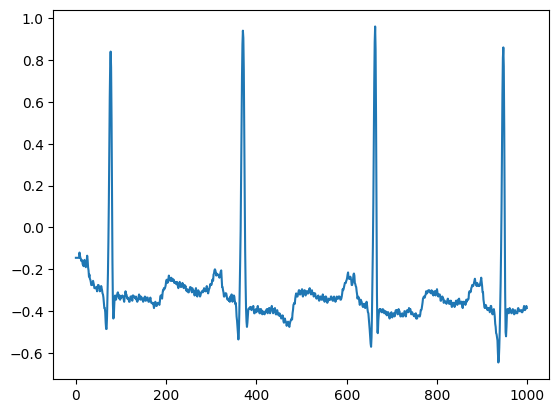

In [ ]:
plt.plot(signal[:1000])

In [ ]:
direct_1 = "/content/drive/MyDrive/datasets/dsp_datasets"

In [ ]:
classes = os.listdir(direct_1)
print(classes)

['supra', 'arrhythmia', 'atrial', 'atrial_preprocessed', 'arrhythmia_preprocessed', 'supra_preprocessed']


In [ ]:

def resample_signal(signal, original_sampling_rate, target_sampling_rate):
    resampling_factor = target_sampling_rate / original_sampling_rate
    num_samples_resampled = int(len(signal) * resampling_factor)
    resampled_signal = sg.resample(signal, num_samples_resampled)
    return resampled_signal

In [ ]:
def preprocessing_arrh(input_signal, record):
    # Split the input signal into blocks
    block_size = 1280
    num_blocks = len(input_signal) // block_size

    processed_data = []

    for i in range(num_blocks):
        block_start = i * block_size
        block_end = (i + 1) * block_size
        block = input_signal[block_start:block_end]

        # Mean removal
        block = block - np.mean(block)

        # Low-pass filtering
        block = sg.filtfilt(*sg.butter(4, 0.9, btype='low'), block)

        # High-pass filtering (baseline wander removal)
        block = sg.filtfilt(*sg.butter(4, 0.0039, btype='high'), block)

        # Normalization
        block = block / np.max(np.abs(block))

        np.save(f"/content/drive/MyDrive/datasets/dsp_datasets/arrhythmia_preprocessed/{record}_{i}.npy", block)



In [ ]:
# Path to the directory containing .dat files
dat_dir_arrhythmia = "/content/drive/MyDrive/datasets/dsp_datasets/arrhythmia/"
dat_dir_supra = "/content/drive/MyDrive/datasets/dsp_datasets/supra/"
dat_dir_atrial = "/content/drive/MyDrive/datasets/dsp_datasets/atrial/"

# Path to the directory to store preprocessed data
output_dir_arrhythmia = "/content/drive/MyDrive/datasets/dsp_datasets/arrhythmia_preprocessed/"
original_sampling_rate_arrhythmia = 360  # Adjust as needed
output_dir_supra = "/content/drive/MyDrive/datasets/dsp_datasets/supra_preprocessed/"
original_sampling_rate_supra = 128  # Adjust as needed
output_dir_atrial = "/content/drive/MyDrive/datasets/dsp_datasets/atrial_preprocessed/"
original_sampling_rate_atrial = 250  # Adjust as needed
# Target sampling rate after resampling
target_sampling_rate = 128  # Adjust as needed

In [ ]:
# Iterate over each .dat file in the directory
a=0
for filename in os.listdir(dat_dir_arrhythmia):
    if filename.endswith(".dat"):
        filepath = os.path.join(dat_dir_arrhythmia, filename)

        # Load the signal using wfdb
        record = wfdb.rdrecord(filepath[:-4])
        signals = record.p_signal  # Extract the signals
        signal = signals[:,0]

        # Original sampling rate
        original_sampling_rate = record.fs

        resampled_signal = resample_signal(signal, original_sampling_rate, target_sampling_rate)

        # Preprocess the resampled signal
        preprocessed_data = preprocessing_arrh(resampled_signal, filename[:3])
        print(a)
        a+=1

In [ ]:
def preprocessing_supra(input_signal, record):
    # Split the input signal into blocks
    block_size = 1280
    num_blocks = len(input_signal) // block_size

    processed_data = []

    for i in range(num_blocks):
        block_start = i * block_size
        block_end = (i + 1) * block_size
        block = input_signal[block_start:block_end]

        # Mean removal
        block = block - np.mean(block)

        # Low-pass filtering
        block = sg.filtfilt(*sg.butter(4, 0.9, btype='low'), block)

        # High-pass filtering (baseline wander removal)
        block = sg.filtfilt(*sg.butter(4, 0.0039, btype='high'), block)

        # Normalization
        block = block / np.max(np.abs(block))

        np.save(f"/content/drive/MyDrive/datasets/dsp_datasets/supra_preprocessed/{record}_{i}.npy", block)



In [ ]:
# Iterate over each .dat file in the directory
b=0
for filename in os.listdir(dat_dir_supra):
    if filename.endswith(".dat"):
        filepath = os.path.join(dat_dir_supra, filename)

        # Load the signal using wfdb
        record = wfdb.rdrecord(filepath[:-4])
        signals = record.p_signal  # Extract the signals
        signal = signals[:,0]

        # Original sampling rate
        original_sampling_rate = record.fs

        resampled_signal = resample_signal(signal, original_sampling_rate, target_sampling_rate)

        # Preprocess the resampled signal
        preprocessed_data = preprocessing_supra(resampled_signal, filename[:3])
        print(b)
        b+=1

In [ ]:
def preprocessing(input_signal, record):
    # Split the input signal into blocks
    block_size = 1280
    num_blocks = len(input_signal) // block_size

    processed_data_atrial = []

    for i in range(num_blocks):
        block_start = i * block_size
        block_end = (i + 1) * block_size
        block = input_signal[block_start:block_end]

        # Mean removal
        block = block - np.mean(block)

        # Low-pass filtering
        block = sg.filtfilt(*sg.butter(4, 0.9, btype='low'), block)

        # High-pass filtering (baseline wander removal)
        block = sg.filtfilt(*sg.butter(4, 0.0039, btype='high'), block)

        # Normalization
        block = block / np.max(np.abs(block))

        np.save(f"/content/drive/MyDrive/datasets/dsp_datasets/atrial_preprocessed/{record}_{i}.npy", block)



In [ ]:
# Iterate over each .dat file in the directory
c=0
for filename in os.listdir(dat_dir_atrial):
    if filename.endswith(".dat"):
        filepath = os.path.join(dat_dir_atrial, filename)

        # Load the signal using wfdb
        record = wfdb.rdrecord(filepath[:-4])
        signals = record.p_signal  # Extract the signals
        signal = signals[:,0]

        # Original sampling rate
        original_sampling_rate = record.fs

        resampled_signal = resample_signal(signal, original_sampling_rate, target_sampling_rate)

        # Preprocess the resampled signal
        preprocessed_data = preprocessing(resampled_signal, filename[:5])
        print(c)
        c+=1

In [ ]:
np.load("/content/drive/MyDrive/datasets/dsp_datasets/supra_preprocessed/826_0.npy").shape

(1280,)

In [ ]:
import os
import numpy as np

# Define your classes list and dataset directory
classes_list = ['arrhythmia_preprocessed', 'atrial_preprocessed', 'supra_preprocessed']  # Replace with your class names
datasetDir = "/content/drive/MyDrive/datasets/dsp_datasets"  # Replace with your dataset directory
save_dir = "/content/drive/MyDrive/datasets"  # Directory to save the dataset

def create_dataset():
    features = []
    labels = []

    # Define the target number of files to load for each class
    target_num_files_per_class = 2000

    total_files_loaded = 0

    for class_index, class_name in enumerate(classes_list):
        class_files_list = os.listdir(os.path.join(datasetDir, class_name))
        num_files_to_load = min(target_num_files_per_class, len(class_files_list))

        print("Loading files for class:", class_name)
        print("Total files available:", len(class_files_list))
        print("Target files to load:", num_files_to_load)

        for file_index, file_name in enumerate(class_files_list[:num_files_to_load], start=1):
            signal_file_path = os.path.join(datasetDir, class_name, file_name)
            array_data = np.load(signal_file_path)

            features.append(array_data)
            labels.append(class_index)

            total_files_loaded += 1
            print("Files loaded:", total_files_loaded, "/", 5999)

            if total_files_loaded >= 5999:
                break  # Stop loading files once 7499 files are loaded

        if total_files_loaded >= 5999:
            break  # Stop loading files from other classes once 4499 files are loaded

    features = np.asarray(features)
    labels = np.asarray(labels)

    # Save the dataset
    np.save(os.path.join(save_dir, 'features.npy'), features)
    np.save(os.path.join(save_dir, 'labels.npy'), labels)

    return features, labels

# Create the dataset
features, labels = create_dataset()

# Now you have your features and labels ready for further processing or modeling
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)


Streaming output truncated to the last 5000 lines.
Files loaded: 1008 / 5999
Files loaded: 1009 / 5999
Files loaded: 1010 / 5999
Files loaded: 1011 / 5999
Files loaded: 1012 / 5999
Files loaded: 1013 / 5999
Files loaded: 1014 / 5999
Files loaded: 1015 / 5999
Files loaded: 1016 / 5999
Files loaded: 1017 / 5999
Files loaded: 1018 / 5999
Files loaded: 1019 / 5999
Files loaded: 1020 / 5999
Files loaded: 1021 / 5999
Files loaded: 1022 / 5999
Files loaded: 1023 / 5999
Files loaded: 1024 / 5999
Files loaded: 1025 / 5999
Files loaded: 1026 / 5999
Files loaded: 1027 / 5999
Files loaded: 1028 / 5999
Files loaded: 1029 / 5999
Files loaded: 1030 / 5999
Files loaded: 1031 / 5999
Files loaded: 1032 / 5999
Files loaded: 1033 / 5999
Files loaded: 1034 / 5999
Files loaded: 1035 / 5999
Files loaded: 1036 / 5999
Files loaded: 1037 / 5999
Files loaded: 1038 / 5999
Files loaded: 1039 / 5999
Files loaded: 1040 / 5999
Files loaded: 1041 / 5999
Files loaded: 1042 / 5999
Files loaded: 1043 / 5999
Files loaded:

In [3]:
import numpy as np

# Load features from the saved numpy file
features = np.load("/content/drive/MyDrive/datasets/features.npy")

# Now you can access the shape of the features array
print("Features shape:", features.shape)


Features shape: (5999, 1280)


In [4]:
import numpy as np

# Load features from the saved numpy file
labels = np.load("/content/drive/MyDrive/datasets/labels.npy")

# Now you can access the shape of the features array
print("labels shape:", labels.shape)


labels shape: (5999,)


In [5]:
# Define your classes list and dataset directory
classes_list = ['arrhythmia_preprocessed', 'atrial_preprocessed', 'supra_preprocessed']

In [6]:
# Reshape features array to add a dummy time dimension
num_samples, num_features = features.shape
num_timesteps = 1  # Add a dummy time dimension

features_reshaped = features.reshape(num_samples, num_timesteps, num_features)

In [7]:
# Print the new shape
print("Features reshaped:", features_reshaped.shape)

Features reshaped: (5999, 1, 1280)


In [8]:
# Define input shape and number of classes
input_shape = features_reshaped.shape[1:]  # Shape is (1, 1280)
num_classes = len(classes_list)

In [9]:
# Define the input shape
input_shape = (1, 1280)

# Define the number of classes
num_classes = 3

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [11]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_reshaped, labels, test_size=0.2, random_state=42)


In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4799, 1, 1280)
(1200, 1, 1280)
(4799,)
(1200,)


In [13]:
import numpy as np

# Remove any extra singleton dimensions
X_train_reshaped = np.squeeze(X_train, axis=1)
X_test_reshaped = np.squeeze(X_test, axis=1)


In [14]:
print(X_train_reshaped.shape)
print(X_test_reshaped.shape)

(4799, 1280)
(1200, 1280)


In [15]:
# Define your Conv1D model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(1280,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Adjust output units based on your number of classes

In [16]:
# Compile your model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Train your model
model.fit(X_train_reshaped, y_train, epochs=3, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

Epoch 1/3
150/150 [==============================] - 15s 91ms/step - loss: 0.6754 - accuracy: 0.6656 - val_loss: 0.4255 - val_accuracy: 0.8125
Epoch 2/3
150/150 [==============================] - 20s 135ms/step - loss: 0.2982 - accuracy: 0.8783 - val_loss: 0.2635 - val_accuracy: 0.8867
Epoch 3/3
150/150 [==============================] - 12s 78ms/step - loss: 0.1443 - accuracy: 0.9485 - val_loss: 0.1894 - val_accuracy: 0.9217


In [23]:
# Evaluate your model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


38/38 [==============================] - 1s 21ms/step - loss: 0.1894 - accuracy: 0.9217
Test Loss: 0.18940450251102448
Test Accuracy: 0.92166668176651


In [24]:
# Save the model to H5 file
model.save("your_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict classes for test data
y_pred = np.argmax(model.predict(X_test_reshaped), axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

38/38 [==============================] - 1s 15ms/step


In [25]:
print(y_pred)

[0 1 2 ... 1 2 1]


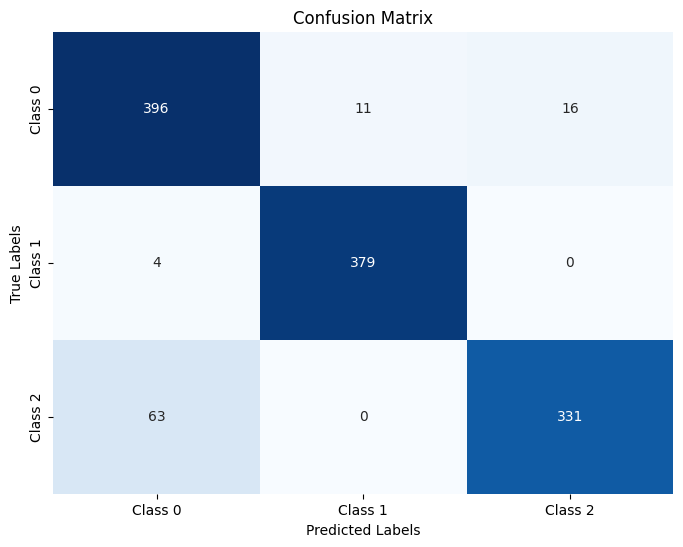

In [26]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [27]:
import tkinter as tk
from tkinter import filedialog
import numpy as np
import tensorflow as tf
import scipy.signal as sg

# Load your trained model
model = tf.keras.models.load_model("your_model.h5")

In [28]:
import os
import numpy as np
from keras.models import load_model

# Paths to the trained model, features.npy, and labels.npy files
trained_model_path = "your_model.h5"
features_path = "/content/drive/MyDrive/datasets/features.npy"
labels_path = "/content/drive/MyDrive/datasets/labels.npy"
save_dir = "/content/drive/MyDrive/datasets/untrained"

In [34]:
# Load the trained model
model = load_model(trained_model_path)

# Load the features and labels
features = np.load(features_path)
labels = np.load(labels_path)


In [31]:
import os
import numpy as np

# Only consider 1000 samples from each class
num_samples_per_class = 100

# Create the untrained directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

for class_index in range(len(np.unique(labels))):
    class_features = features[labels == class_index][:num_samples_per_class]
    class_labels = labels[labels == class_index][:num_samples_per_class]

    class_dir = os.path.join(save_dir, f"class_{class_index}")
    os.makedirs(class_dir, exist_ok=True)

    for i in range(len(class_features)):
        features_file_path = os.path.join(class_dir, f"sample_{i}_features.npy")
        labels_file_path = os.path.join(class_dir, f"sample_{i}_labels.npy")

        np.save(features_file_path, class_features[i])
        np.save(labels_file_path, class_labels[i])

print("Untrained data saved successfully.")


Untrained data saved successfully.


In [41]:
import numpy as np
from keras.models import load_model

# Load the trained model
model = load_model("/content/your_model.h5")

# Define the classes list
classes_list = ['arrhythmia', 'atrial', 'supra']  # Replace with your class names

# Slice the features and labels arrays to select only the first 1000 samples from each class
num_samples_per_class = 100
sliced_features = np.concatenate([features[labels == class_index][:num_samples_per_class] for class_index in range(len(classes_list))])
sliced_labels = np.concatenate([labels[labels == class_index][:num_samples_per_class] for class_index in range(len(classes_list))])

# Predict the classes for the sliced features
predicted_labels = model.predict(sliced_features)
predicted_classes = np.argmax(predicted_labels, axis=1)

# Calculate accuracy
accuracy = np.mean(predicted_classes == sliced_labels)

print("Accuracy:", accuracy)


10/10 [==============================] - 0s 16ms/step
Accuracy: 0.98


In [ ]:
import numpy as np
from keras.models import load_model

# Load the trained model
model = load_model("/content/your_model.h5")

# Define the classes list
classes_list = ['arrhythmia', 'atrial', 'supra']  # Replace with your class names

from google.colab import drive
import os
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

def predict_class(features_path, labels_path):
    # Load the features and labels
    features = np.load(features_path)
    labels = np.load(labels_path)

    # Your prediction logic here
    # For example, you can use a trained model to predict the class based on the features
    predicted_class_index = 0  # Placeholder for predicted class index

    # Map predicted class index to class label
    classes = ['arrhythmia', 'atrial', 'supra']
    predicted_class_label = classes[predicted_class_index]

    # Return the predicted class label
    return predicted_class_label


def handle_file_upload():
    try:
        # Prompt user to select a file from Google Drive
        features_path = input("Enter the path of the features.npy file in your Google Drive: ")
        labels_path = input("Enter the path of the labels.npy file in your Google Drive: ")

        if not os.path.exists(features_path):
            return "Error: Features file not found in Google Drive"
        if not os.path.exists(labels_path):
            return "Error: Labels file not found in Google Drive"

        # Predict the class for the selected file
        predicted_class = predict_class(features_path, labels_path)
        return predicted_class
    except Exception as e:
        return "Error: " + str(e)

# Example usage:
predicted_class = handle_file_upload()
print("Predicted class:", predicted_class)
